In [1]:
import tensorflow as tf
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler

2022-11-04 12:30:17.758226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load data (must be in same folder as this file, which it will be if you simply unzip the assignment).
# Note that we don't have any y_test! This way you cannot "cheat"!

x_train = np.load('../Common/data/X_train.npy')
x_test = np.load('../Common/data/X_test.npy')
y_train = np.load('../Common/data/y_train.npy')

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train.shape, x_test.shape, y_train.shape)

(40000, 84) (10000, 84) (40000,)


In [31]:
# Model 1
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(84,)),
    tf.keras.layers.Dense(62, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
    ])

model.compile(
    loss='mse',
    optimizer='rmsprop',
    metrics=['mae'],
    )

history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1250/1250 [==============================] - 4s 2ms/step - loss: 0.0933 - mae: 0.2122
Epoch 2/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0311 - mae: 0.1333
Epoch 3/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0254 - mae: 0.1180
Epoch 4/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0226 - mae: 0.1082
Epoch 5/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0204 - mae: 0.1003
Epoch 6/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0187 - mae: 0.0941
Epoch 7/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0173 - mae: 0.0880
Epoch 8/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0159 - mae: 0.0830
Epoch 9/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0147 - mae: 0.0791
Epoch 10/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0138 - mae: 0.0764
Epoch 11/50
1250/1250 [======

In [26]:
import matplotlib.pyplot as plt
def plot_hist(history, metric = "root_mean_squared_error"):
    acc = history.history[metric]
    val_acc = history.history["val_" + str(metric)]
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    figure, axis = plt.subplots(2, 1)

    axis[0].plot(epochs, acc, label = 'Training msqe')
    axis[0].plot(epochs, val_acc, label = 'Validation msqe')
    axis[0].set_title('Training and validation mean squared error')
    axis[0].legend(loc = "upper right")

    axis[1].plot(epochs, loss, label = 'Training loss')
    axis[1].plot(epochs, val_loss, label = 'Training loss')
    axis[1].set_title('Training and validation loss')
    axis[1].legend(loc = "upper right")

    plt.subplots_adjust(hspace = 0.4)

    plt.show()

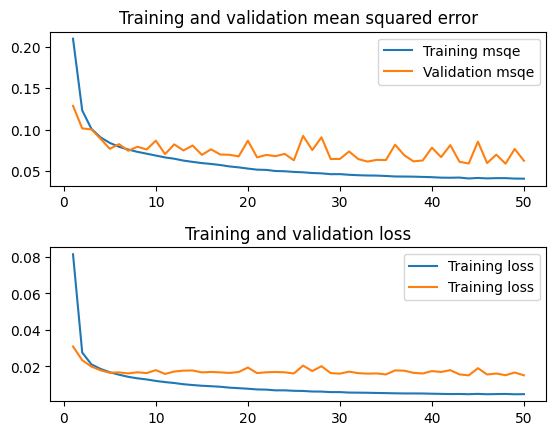

In [28]:
plot_hist(history, metric="mae")

In [32]:
import pandas as pd
y_test_hat = model.predict(x_test)
y_test_hat_pd = pd.DataFrame({
    'Id': list(range(10000)),
    'Predicted': y_test_hat.reshape(-1),
})

313/313 [==============================] - 1s 3ms/step


In [30]:
assert isinstance(y_test_hat_pd, pd.DataFrame)
assert all(y_test_hat_pd.columns == ['Id', 'Predicted'])
assert len(y_test_hat_pd) == 10000

# If you pass the checks, the file is saved.
y_test_hat_pd.to_csv('y_test_hat.csv', index=False)